In [33]:
import numpy as np
from tabulate import tabulate
import os
import sys
# print(sys.executable)
from scipy.io import savemat
from scipy.io import loadmat
from scipy.optimize import curve_fit
from matplotlib import font_manager 
font_manager.fontManager.addfont('Arial.ttf')

In [34]:
# %pip list
# !python -V

In [35]:
num_cycles = 6 

In [36]:
n2 = 9 ;
k = 4 ;
remove_X_list = [2,8] ;  remove_Z_list = [3,4] ;

In [37]:
import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [38]:
max_num_cycles = 6 ;

In [39]:
# import subprocess
# script = "ErrorCorrection_for_experiment_18_4_4.py"
# cycles = range(1, max_num_cycles+1)

# processes = []
# for cycle in cycles:
#     p = subprocess.Popen([sys.executable, script, str(cycle)])
#     processes.append(p)

# # 等待所有进程完成
# for p in processes:
#     p.wait()

## Load the results

In [40]:
set_exp_x_devents = {}
set_exp_num_x = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_exp_x_devents[f"cycle_{cycle}"] = data['dict_cycle_x_devents']
    set_exp_num_x.append(data['num_instance_x'][0][0])

In [41]:
set_exp_z_devents = {}
set_exp_num_z = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_exp_z_devents[f"cycle_{cycle}"] = data['dict_cycle_z_devents']
    set_exp_num_z.append(data['num_instance_z'][0][0])

In [42]:
exp_X_logic_error = [];
exp_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    exp_X_logic_error.append( data['logical_error_probability'][0][0] )
    exp_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [43]:
exp_Z_logic_error = [];
exp_Z_logic_error_perbit  = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    exp_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    exp_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [44]:
# Pauli+ sim results
sim_Z_logic_error = [];
sim_Z_logic_error_perbit = [] ;
for cycle in range(6, max_num_cycles+1):
    fname = './Pauli_plus_simulation/Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    sim_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    sim_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

sim_X_logic_error = [];
sim_X_logic_error_perbit = [] ;
for cycle in range(6, max_num_cycles+1):
    fname = './Pauli_plus_simulation/Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    sim_X_logic_error.append( data['logical_error_probability'][0][0] )
    sim_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [45]:
set_sim_num_z = [] ; set_sim_num_x = [] ;
z_retained_frac = [] ; x_retained_frac = [] ;

set_sim_syndrome_Z = {}
for cycle in range(6, max_num_cycles+1):
    fname = './Pauli_plus_simulation/Numerical_data/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_sim_syndrome_Z[f"cycle_{cycle}"] = data['syndrome_history_Z']
    set_sim_num_z.append(data["retained_num_samples"][0][0])
    z_retained_frac.append(data["retain_data_fraction"][0][0])

set_sim_syndrome_X = {}
for cycle in range(6, max_num_cycles+1):
    fname = './Pauli_plus_simulation/Numerical_data/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_sim_syndrome_X[f"cycle_{cycle}"] = data['syndrome_history_X']
    set_sim_num_x.append(data["retained_num_samples"][0][0])
    x_retained_frac.append(data["retain_data_fraction"][0][0])

In [ ]:
# pauli sim results
set_pauli_sim_num_z = [40000] * max_num_cycles ;
set_pauli_sim_num_x = [40000] * max_num_cycles ;

set_pauli_sim_syndrome_Z = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_data/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_pauli_sim_syndrome_Z[f"cycle_{cycle}"] = data['syndrome_history_Z'] ;

set_pauli_sim_syndrome_X = {}
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_data/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_pauli_sim_syndrome_X[f"cycle_{cycle}"] = data['syndrome_history_X'] ;

In [ ]:
pauli_sim_Z_logic_error = [];
pauli_sim_Z_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    pauli_sim_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    pauli_sim_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

pauli_sim_X_logic_error = [];
pauli_sim_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Numerical_results/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    pauli_sim_X_logic_error.append( data['logical_error_probability'][0][0] )
    pauli_sim_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

## Error detection probability

In [46]:
# exp logical Z state
labels_z = ['Z0', 'Z1', 'Z2', 'X5', 'Z6', 'Z7', 'Z8']

exp_z_detect = [np.mean(np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)) \
                      for cycle in range(1, max_num_cycles+1)]
exp_z_detect += [np.mean(np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0)) ]

# for cycle, prob in  zip(range(1, max_num_cycles+2), exp_z_detect):
#     print( f'The mean probability of error detection in cycle {cycle} is:', prob )

exp_per_z_detect = [ np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)  \
         for cycle in range(1, max_num_cycles+1) ] +  \
            [ np.mean(set_exp_z_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0) ]

In [47]:
np.mean(exp_z_detect)
exp_z_detect 

[0.1621431683697134,
 0.319535609372145,
 0.3508068807238133,
 0.3555696555823054,
 0.3626214537707644,
 0.36110949362386524,
 0.32292095440225366]

In [48]:
# exp logical X state
labels_x =  ['X0', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7']

exp_x_detect = [np.mean(np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)) for cycle in range(1, max_num_cycles+1)]
exp_x_detect += [np.mean(np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0)) ]

# for cycle, prob in  zip(range(1, max_num_cycles+2), exp_x_detect):
#     print( f'The mean probability of error detection in cycle {cycle} is:', prob )

exp_per_x_detect = [ np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"][f'cycle_{cycle}'][0][0], axis=0)  \
         for cycle in range(1, max_num_cycles+1) ] +  \
            [ np.mean(set_exp_x_devents[f"cycle_{max_num_cycles}"]['final'][0][0], axis=0) ]

In [49]:
np.mean(exp_x_detect)
exp_x_detect 

[0.21149813381606644,
 0.315703403878815,
 0.3485034933742844,
 0.3504073060846749,
 0.35633841491319956,
 0.35500208483763684,
 0.29177150179499434]

In [63]:
sim_per_x_detect

[[0.1565974407384099,
  0.3393119362282358,
  0.3590308370044053,
  0.36102370463603944,
  0.36500943989930773,
  0.3657436542899098,
  0.2697713446612125],
 [0.15859030837004406,
  0.32273966855464653,
  0.34036081392909584,
  0.34571009020348226,
  0.34413677365219214,
  0.354835326200965,
  0.2671491504090623],
 [0.1749528005034613,
  0.3472834067547724,
  0.3564086427522551,
  0.3655338787497378,
  0.3724564715754143,
  0.3670023075309419,
  0.27942101950912523],
 [0.15345080763582966,
  0.33102580239144114,
  0.3388923851478918,
  0.342248793790644,
  0.34896161107614854,
  0.3526326830291588,
  0.27155443675267465],
 [0.1697084119991609,
  0.33962659953849383,
  0.3569330816026851,
  0.3634361233480176,
  0.36249213341724357,
  0.36385567442836164,
  0.2739668554646528],
 [0.17610656597440738,
  0.33585063981539753,
  0.3501153765470946,
  0.36375078665827565,
  0.3596601636249213,
  0.35714285714285715,
  0.26893224250052444],
 [0.14663310258023915,
  0.3102580239144116,
  0.314

In [50]:
# Pauli+
# sim logical Z state
num_zcheck = len(labels_z) ;
temp = np.mean(set_sim_syndrome_Z[f"cycle_{max_num_cycles}"], axis=0)

sim_z_detect = [ np.mean(temp[num_zcheck*cycle:num_zcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
# for cycle in range(max_num_cycles+1) :
#     print( f'The mean probability of error detection in cycle {cycle+1} is:', sim_z_detect[cycle] )
sim_per_z_detect = [ [ temp[i + cycle*num_zcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_zcheck) ]

In [51]:
np.mean(sim_z_detect)

0.29589734100934834

In [53]:
# Pauli+
# sim logical X state
num_xcheck = len(labels_x) ;
temp = np.mean(set_sim_syndrome_X[f"cycle_{max_num_cycles}"], axis=0)

sim_x_detect = [ np.mean(temp[num_xcheck*cycle:num_xcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
# for cycle in range(max_num_cycles+1) :
#     print( f'The mean probability of error detection in cycle {cycle+1} is:', sim_x_detect[cycle] )
sim_per_x_detect = [ [ temp[i + cycle*num_xcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_xcheck) ]

In [54]:
np.mean(sim_x_detect)

0.31018952577884523

In [ ]:
# Pauli sim
# logical Z state
temp = np.mean(set_pauli_sim_syndrome_Z[f"cycle_{max_num_cycles}"], axis=0)

pauli_sim_z_detect = [ np.mean(temp[num_zcheck*cycle:num_zcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]

pauli_sim_per_z_detect = [ [ temp[i + cycle*num_zcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_zcheck) ]

# logical X state
temp2 = np.mean(set_pauli_sim_syndrome_X[f"cycle_{max_num_cycles}"], axis=0)
pauli_sim_x_detect = [ np.mean(temp2[num_xcheck*cycle:num_xcheck*(cycle+1)]) for cycle in range(max_num_cycles+1) ]
pauli_sim_per_x_detect = [ [ temp2[i + cycle*num_xcheck ] for cycle in range(max_num_cycles+1) ] for i in range(num_xcheck) ]

In [ ]:
# sim_per_x_detect

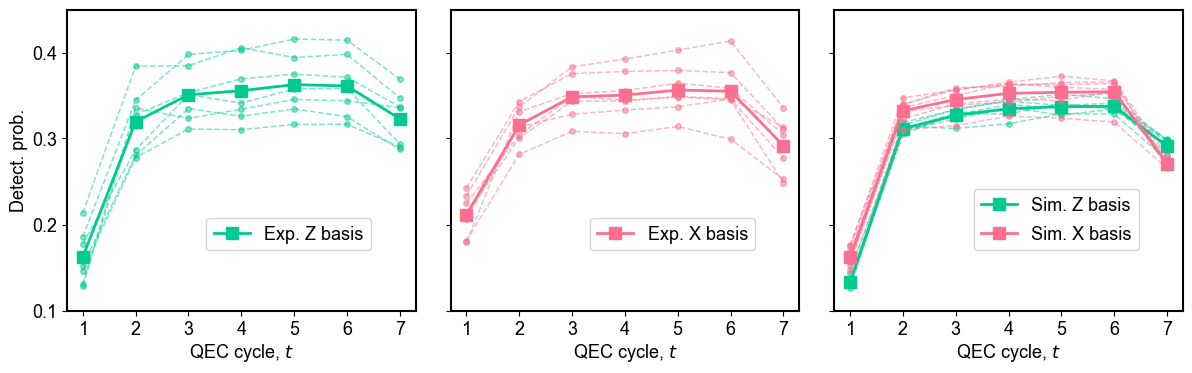

In [58]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 12, 3.5
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 3)
ax11, ax12, ax13 = ax

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax12.spines['top'].set_linewidth(spine_width)    
ax12.spines['bottom'].set_linewidth(spine_width) 
ax12.spines['left'].set_linewidth(spine_width)   
ax12.spines['right'].set_linewidth(spine_width)  
ax13.spines['top'].set_linewidth(spine_width)    
ax13.spines['bottom'].set_linewidth(spine_width) 
ax13.spines['left'].set_linewidth(spine_width)   
ax13.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(1-0.3, 7+0.3)
ax12.set_xlim(1-0.3, 7+0.3)
ax13.set_xlim(1-0.3, 7+0.3)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax12.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax13.xaxis.set_major_locator(ticker.MultipleLocator(1))  
ax11.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax12.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax13.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  
ax11.set_ylim(0.1, 0.45)
ax12.set_ylim(0.1, 0.45)
ax13.set_ylim(0.1, 0.45)
ax12.yaxis.set_tick_params(labelleft=False)
ax13.yaxis.set_tick_params(labelleft=False)

ax11.plot( range(1, max_num_cycles+2), exp_z_detect, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp. Z basis" )
for i in range( n2 - len(remove_Z_list) ):
    ax11.plot( range(1, max_num_cycles+2), [item[i] for item in exp_per_z_detect], color = (0/255,202/255,145/255), \
              linestyle = "dashed", linewidth=1.1, alpha = 0.5, marker = 'o', markersize = 4)

ax11.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.4, fontsize=f'{fontsize}')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 
ax11.set_ylabel('Detect. prob.', labelpad = 3) 


ax12.plot( range(1, max_num_cycles+2), exp_x_detect, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp. X basis" )
for i in range( n2 - len(remove_X_list) ):
    ax12.plot( range(1, max_num_cycles+2), [item[i] for item in exp_per_x_detect], color = (251/255, 111/255, 143/255), \
              linestyle = "dashed", linewidth=1.1, alpha = 0.5, marker = 'o', markersize = 4)

ax12.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.4, fontsize=f'{fontsize}')
ax12.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 


ax13.plot( range(1, max_num_cycles+2), sim_z_detect, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Sim. Z basis" )
for i in range( n2 - len(remove_X_list) ):
    ax13.plot( range(1, max_num_cycles+2), sim_per_z_detect[i], color = (0/255,202/255,145/255), linestyle = "dashed", \
              linewidth=1.1,  alpha = 0.5, marker = 'o', markersize = 4)
    
ax13.plot( range(1, max_num_cycles+2), sim_x_detect, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Sim. X basis" )
for i in range( n2 - len(remove_X_list) ):
    ax13.plot( range(1, max_num_cycles+2), sim_per_x_detect[i], color = (251/255, 111/255, 143/255), linestyle = "dashed", \
              linewidth=1.1,  alpha = 0.5, marker = 'o', markersize = 4)
    

ax13.legend(frameon=True, loc=(0.4, 0.2), labelspacing=0.6, fontsize=f'{fontsize}', columnspacing=8.5, handlelength=2)
ax13.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 


plt.subplots_adjust(left = 0.06, bottom = 0.13, top = 0.99, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
fig.savefig('Experimental_Figures/detection_prob_18_4_4_experiment.pdf', format='pdf', facecolor='None')

In [ ]:
# sim_per_z_detect

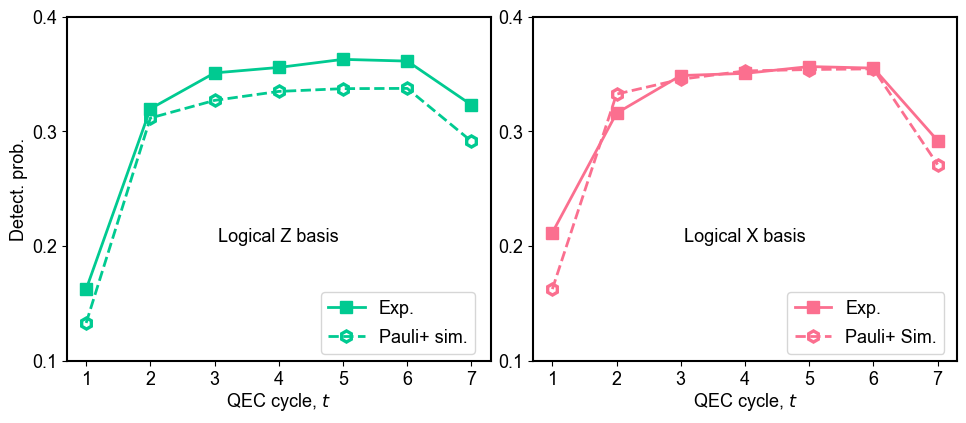

In [59]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 2)
ax11, ax12 = ax

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(1-0.3, 7+0.3)

ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax11.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  

ax11.set_ylim(0.1, 0.4)

ax11.plot( range(1, max_num_cycles+2), exp_z_detect, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp." )

ax11.plot( range(1, max_num_cycles+2), sim_z_detect, color = (0/255,202/255,145/255), linestyle = "dashed", linewidth = 2, 
        marker = 'h', markersize = 8, markerfacecolor='none', markeredgewidth=2.4, label = "Pauli+ sim." )

# ax11.plot( range(1, max_num_cycles+2), pauli_sim_z_detect, color = "black", linestyle = "-.", linewidth = 2, 
#         marker = '>', markersize = 8, markerfacecolor='none', markeredgewidth=2.4, label = "Pauli sim." )

ax11.text(4, 0.2, "Logical Z basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax11.legend(frameon=True, loc=(0.6, 0.02), labelspacing=0.6, fontsize=f'{fontsize}')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 
ax11.set_ylabel('Detect. prob.', labelpad = 3) 

##----------------------------------------------------------------------------------------------------------------
ax12.spines['top'].set_linewidth(spine_width)    
ax12.spines['bottom'].set_linewidth(spine_width) 
ax12.spines['left'].set_linewidth(spine_width)   
ax12.spines['right'].set_linewidth(spine_width)  

ax12.set_xlim(1-0.3, 7+0.3)

ax12.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax12.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  

ax12.set_ylim(0.1, 0.4)


ax12.plot( range(1, max_num_cycles+2), exp_x_detect, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Exp." )

ax12.plot( range(1, max_num_cycles+2), sim_x_detect, color = (251/255, 111/255, 143/255), linestyle = "dashed", linewidth = 2, 
        marker = 'h', markersize = 8, markerfacecolor='none', markeredgewidth=2.4, label = "Pauli+ Sim." )

# ax12.plot( range(1, max_num_cycles+2), pauli_sim_x_detect, color = "black", linestyle = "-.", linewidth = 2, 
#         marker = '>', markersize = 8, markerfacecolor='none', markeredgewidth=2.4, label = "Pauli sim." )

ax12.legend(frameon=True, loc=(0.6, 0.02), labelspacing=0.6, fontsize=f'{fontsize}')
ax12.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 

ax12.text(4, 0.2, "Logical X basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

plt.subplots_adjust(left = 0.1, bottom = 0.12, top = 0.98, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
# fig.savefig('Experimental_Figures/detection_prob_18_4_4.pdf', format='pdf', facecolor='None')

## Logical-state preservation and error per cycle

In [ ]:
T1 = 41.83 #us
T_phi = 39.7 #us
T2 = 1 / ( 1/(2*T1) + 1/T_phi )
cycle_time = 1.895 #us

def k_to_one(p, k):
    return 1-(1-p)**(1/k)

def physical_vs_cycle(cycle, T):
    k = 4 ;
    t = cycle * 1.895

    return (1 - np.exp(-t/T))/2

def four_physical_vs_cycle(cycle, T):   
    p = physical_vs_cycle(cycle, T)
    return 1 - (1 - p)**k

In [ ]:
# accumulated error rate for four physical qubits
# cycle_t_physical = np.linspace(1, max_num_cycles+1) ;
# physical_error_single_qubit_z = [physical_p_per_cycle(cycle_time*t, T1) for t in cycle_t_physical]
# physical_error_four_qubits_z =  [ 1 - (1 - item)**k for item in physical_error_single_qubit_z ]  ;
# physical_error_single_qubit_x = [physical_p_per_cycle(cycle_time*t, T2) for t in cycle_t_physical]
# physical_error_four_qubits_x =  [ 1 - (1 - item)**k for item in physical_error_single_qubit_x ]  ;

## logical Z state

We fit using the relation $1- \eta ~P(t) \propto  (1 - \eta~ p_L)^{t}$.

In [ ]:
cycle_t = np.arange(1, max_num_cycles+1) ;
cycle_interpo = np.linspace(1, max_num_cycles+1, 100) ;

In [ ]:
# eta = 1

# Z_logic_error_perbit = np.mean(exp_Z_logic_error_perbit, axis=1)
# Z_logic_fid_perbit = 1 - eta * np.array( Z_logic_error_perbit )
# log_Z_logic_fid_perbit = np.log(Z_logic_fid_perbit)

# coeff_per, cov_per = np.polyfit(cycle_t, log_Z_logic_fid_perbit, deg=1, cov=True)
# log_A, log_B = coeff_per

# A = np.exp(log_A)
# B = np.exp(log_B)

# Z_logic_error_percycle_perbit = (1 - A)/eta
# print(f"Logical error rate per cycle per bit = {Z_logic_error_percycle_perbit}")

# pred_Z_logic_error_perbit = (1 - B * A**(cycle_interpo))/eta

In [ ]:
eta = 1
exp_Z_logic_fid = 1 - eta * np.array( exp_Z_logic_error[0:] )
log_exp_Z_logic_fid = np.log(exp_Z_logic_fid)

sigma_exp_Z_logic_error = [ np.sqrt(item*(1-item)/set_exp_num_z[index]) for index, item in enumerate(exp_Z_logic_error[0:])];

# sigma_log_exp_Z_logic_fid = [1] * max_num_cycles ;
# sigma_log_exp_Z_logic_fid = [ sigma_exp_Z_logic_error[i]/exp_Z_logic_fid[i] for i in range(0, max_num_cycles) ] ;
# exp_Wz = 1/np.array(sigma_log_exp_Z_logic_fid)**2

coeff, cov = np.polyfit(cycle_t, log_exp_Z_logic_fid, deg=1, cov=True)

log_A, log_B = coeff  # [Slope, intercept]

sigma_log_A = np.sqrt(cov[0,0]) ;
exp_sigma_pL_z = np.exp(log_A) * sigma_log_A ;  #  

A = np.exp(log_A)
B = np.exp(log_B)

exp_Z_logic_error_percycle = (1 - A)/eta
print(f"Logical error rate for four logical qubits per cycle = {exp_Z_logic_error_percycle} ± {exp_sigma_pL_z}")

# The fit line
pred_exp_Z_logic_error = (1 - B * A**(cycle_interpo))/eta

In [ ]:
exp_Z_logic_error_perbit_percycle = k_to_one(exp_Z_logic_error_percycle, k)

exp_sigma_pL_z_perbit = exp_sigma_pL_z / (k * (1 - exp_Z_logic_error_percycle )**(1-1/k)    )

print("Compared to four patches of disrance-4 surface codes with each achieving the logical error per cycle:", 
      exp_Z_logic_error_perbit_percycle )
print("The error bar is:",  exp_sigma_pL_z_perbit)

## logical X state

In [ ]:
exp_X_logic_fid = 1 - np.array( exp_X_logic_error[0:] )
log_exp_X_logic_fid = np.log(exp_X_logic_fid)

sigma_exp_X_logic_error = [ np.sqrt(item*(1-item)/set_exp_num_x[index]) for index, item in enumerate(exp_X_logic_error[0:])];

# sigma_log_exp_X_logic_fid = [1] * max_num_cycles ;
# sigma_log_exp_X_logic_fid = [ sigma_exp_X_logic_error[i]/exp_X_logic_fid[i] for i in range(0, max_num_cycles) ] ;
# exp_Wx = 1/np.array(sigma_log_exp_X_logic_fid)**2

coeff, cov = np.polyfit(cycle_t, log_exp_X_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
exp_sigma_pL_x = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

exp_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {exp_X_logic_error_percycle} ± {exp_sigma_pL_x} ")

# The fit line
pred_exp_X_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
exp_X_logic_error_perbit_percycle = k_to_one(exp_X_logic_error_percycle, k)

exp_sigma_pL_x_perbit = exp_sigma_pL_x / (k * (1 - exp_X_logic_error_percycle )**(1-1/k)    )

print("Compared to four patches of disrance-4 surface codes with each achieving the logical error per cycle:", 
      exp_X_logic_error_perbit_percycle )
print("The error bar is:",  exp_sigma_pL_x_perbit)

In [ ]:
Exp_XZ = (exp_X_logic_error_perbit_percycle + exp_Z_logic_error_perbit_percycle) / 2
print("The experimental average logical error per cycle is:", Exp_XZ)
Exp_bar_XZ = np.sqrt(exp_sigma_pL_x_perbit**2 + exp_sigma_pL_z_perbit**2)/2
print("The experimental average bar of the logical error per cycle is:", Exp_bar_XZ)

In [ ]:
# Exp_XZ = (exp_X_logic_error_percycle + exp_Z_logic_error_percycle) / 2
# print("The experimental average logical error per cycle is:", Exp_XZ)
# Exp_bar_XZ = np.sqrt(exp_sigma_pL_z**2 + exp_sigma_pL_x**2)/2
# print("The experimental average bar of the logical error per cycle is:", Exp_bar_XZ)

# print("Compared to four patches of disrance-4 surface codes with each achieving the logical error per cycle:", 
#       k_to_one(Exp_XZ, k) )
# print("The error bar is:", Exp_bar_XZ / (k * (1 - Exp_XZ )**(1-1/k)    ) )

## Pauli+ sim results

In [ ]:
sim_Z_logic_fid = 1 - np.array( sim_Z_logic_error[0:] )
log_sim_Z_logic_fid = np.log(sim_Z_logic_fid)

sigma_sim_Z_logic_error = [ np.sqrt(item*(1-item)/set_sim_num_z[index]) for index, item in enumerate(sim_Z_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_sim_Z_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
sim_sigma_pL_z = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

sim_Z_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {sim_Z_logic_error_percycle} ± {sim_sigma_pL_z} ")

# The fit line
pred_sim_Z_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
sim_Z_logic_error_perbit_percycle = k_to_one(sim_Z_logic_error_percycle, k)

sim_sigma_pL_z_perbit = sim_sigma_pL_z / (k * (1 - sim_Z_logic_error_percycle )**(1-1/k)    )

print("The logical error per logical qubit per cycle:", 
      sim_Z_logic_error_perbit_percycle )
print("The error bar is:",  sim_sigma_pL_z_perbit)

In [ ]:
sim_X_logic_fid = 1 - np.array( sim_X_logic_error[0:] )
log_sim_X_logic_fid = np.log(sim_X_logic_fid)

sigma_sim_X_logic_error = [ np.sqrt(item*(1-item)/set_sim_num_x[index]) for index, item in enumerate(sim_X_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_sim_X_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

sigma_log_A = np.sqrt(cov[0,0]) ;
sim_sigma_pL_x = np.exp(log_A) * sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

sim_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {sim_X_logic_error_percycle} ± {sim_sigma_pL_x} ")

# The fit line
pred_sim_X_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
sim_X_logic_error_perbit_percycle = k_to_one(sim_X_logic_error_percycle, k)

sim_sigma_pL_x_perbit = sim_sigma_pL_x / (k * (1 - sim_X_logic_error_percycle )**(1-1/k)    )

print("The logical error per logical qubit per cycle:", 
      sim_X_logic_error_perbit_percycle )
print("The error bar is:",  sim_sigma_pL_x_perbit)

## Pauli sim results

In [ ]:
pauli_sim_Z_logic_fid = 1 - np.array( pauli_sim_Z_logic_error[0:] )
log_pauli_sim_Z_logic_fid = np.log(pauli_sim_Z_logic_fid)

sigma_pauli_sim_Z_logic_error = [ np.sqrt(item*(1-item)/set_pauli_sim_num_z[index])  \
                               for index, item in enumerate(pauli_sim_Z_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_pauli_sim_Z_logic_fid, deg = 1, cov = True)

log_A, log_B = coeff 

pauli_sigma_log_A = np.sqrt(cov[0,0]) ;
pauli_sim_sigma_pL_z = np.exp(log_A) * pauli_sigma_log_A ;   

A = np.exp(log_A)
B = np.exp(log_B)

pauli_sim_Z_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {pauli_sim_Z_logic_error_percycle} ± {pauli_sim_sigma_pL_z} ")

# The fit line
pred_pauli_sim_Z_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
pauli_sim_Z_logic_error_perbit_percycle = k_to_one(pauli_sim_Z_logic_error_percycle, k)

pauli_sim_sigma_pL_z_perbit = pauli_sim_sigma_pL_z / ( k * (1 - pauli_sim_Z_logic_error_percycle )**(1-1/k)  )

print("The logical error per logical qubit per cycle:", 
      pauli_sim_Z_logic_error_perbit_percycle )
print("The error bar is:",  pauli_sim_sigma_pL_z_perbit)

In [ ]:
pauli_sim_X_logic_fid = 1 - np.array( pauli_sim_X_logic_error[0:] )
log_pauli_sim_X_logic_fid = np.log(pauli_sim_X_logic_fid)

sigma_pauli_sim_X_logic_error = [ np.sqrt(item*(1-item)/set_pauli_sim_num_x[index])  \
                                 for index, item in enumerate(pauli_sim_X_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_pauli_sim_X_logic_fid, deg=1, cov=True)

log_A, log_B = coeff 

pauli_sigma_log_A = np.sqrt(cov[0,0]) ;
pauli_sim_sigma_pL_x = np.exp(log_A) * pauli_sigma_log_A ;  #   

A = np.exp(log_A)
B = np.exp(log_B)

pauli_sim_X_logic_error_percycle = 1 - A
print(fr"Logical error rate for four logical qubits per cycle = {pauli_sim_X_logic_error_percycle} ± {pauli_sim_sigma_pL_x} ")

# The fit line
pred_pauli_sim_X_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
pauli_sim_X_logic_error_perbit_percycle = k_to_one(pauli_sim_X_logic_error_percycle, k)

pauli_sim_sigma_pL_x_perbit = pauli_sim_sigma_pL_x / ( k * (1 - pauli_sim_X_logic_error_percycle )**(1-1/k)  )

print("The logical error per logical qubit per cycle:", 
      pauli_sim_X_logic_error_perbit_percycle )
print("The error bar is:",  pauli_sim_sigma_pL_x_perbit)

## Plot

In [ ]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

marker_list = [ "o", "s", "d", "<", "p", "H" ]

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 13.5})
fontsize = 13.5 ;

fig, (ax11, ax21) = plt.subplots( 1, 2,              
    figsize=(7.5, 4.5)   
)

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax21.spines['top'].set_linewidth(spine_width)    
ax21.spines['bottom'].set_linewidth(spine_width) 
ax21.spines['left'].set_linewidth(spine_width)   
ax21.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(0, 7.2)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax11.set_ylim(0, 1)

ax11.plot( cycle_t, exp_Z_logic_error, color = "green", linestyle = "", linewidth = 2, \
        marker = 'h', markersize = 9, label = 'Exp: $9.15\%$' )

ax11.plot( cycle_interpo, pred_exp_Z_logic_error, color = 'green', linestyle = "solid", linewidth=2)

ax11.plot( cycle_t, sim_Z_logic_error, color = '#d1800f', linestyle = "", linewidth=1, 
        marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, \
                              label = f'Pauli+ sim: {sim_Z_logic_error_perbit_percycle*100:.2f}%' )

ax11.plot( cycle_interpo, pred_sim_Z_logic_error, color = '#d1800f', linestyle = "dashed", linewidth=2)

# ax11.plot( cycle_t, pauli_sim_Z_logic_error, color = 'purple', linestyle = "", linewidth=1, 
#         marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, \
#                               label = f'Pauli sim: {pauli_sim_Z_logic_error_perbit_percycle*100:.2f}%' )

# ax11.plot( cycle_interpo, pred_pauli_sim_Z_logic_error, color = 'purple', linestyle = "dashed", linewidth=2)

ax11.plot( cycle_interpo, four_physical_vs_cycle(cycle_interpo, T1), color = '#5F9EA0', 
          linestyle = "-.", linewidth=2.5, label = f'Physical: {100*physical_vs_cycle(1, T1):.2f}%')

#-----------------------------------------------------------------------------------------------------------------------------------
ax11.legend(frameon=False, loc=(-0.01, 0.76), ncol=1, columnspacing=1.5, labelspacing=0.6, handlelength=2, fontsize=f'{fontsize}')

ax11.text(4.5, 0.15, "Logical Z basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 
ax11.set_ylabel(r'Logical error probability, $P_L(t)$', labelpad = 3) 

#---------------------------------------------------------------------------
ax21.set_xlim(0, 7.2)
ax21.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax21.yaxis.set_tick_params(labelleft=False)
ax21.set_ylim(0, 1)

ax21.plot( cycle_t, exp_X_logic_error, color = 'green', linestyle = "", linewidth=2, 
        marker = 'h', markersize = 9, label = 'Exp: $8.67\%$' )

ax21.plot( cycle_interpo, pred_exp_X_logic_error, color = 'green', linestyle = "solid", linewidth = 2)

ax21.plot( cycle_t, sim_X_logic_error, color = '#d1800f', linestyle = "", linewidth=1, 
        marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, 
                              label = f'Pauli+ sim: {sim_X_logic_error_perbit_percycle*100:.2f}%' )

ax21.plot( cycle_interpo, pred_sim_X_logic_error, color = '#d1800f', linestyle = "dashed", linewidth = 2)

# ax21.plot( cycle_t, pauli_sim_X_logic_error, color = 'purple', linestyle = "", linewidth=1, 
#         marker = 'h', markerfacecolor='none', markeredgewidth=2.8, markersize = 9, \
#                               label = f'Pauli sim: {pauli_sim_X_logic_error_perbit_percycle*100:.2f}%' )

# ax21.plot( cycle_interpo, pred_pauli_sim_X_logic_error, color = 'purple', linestyle = "dashed", linewidth=2)


ax21.plot( cycle_interpo, four_physical_vs_cycle(cycle_interpo, T2), color = '#5F9EA0', 
          linestyle = "-.", linewidth = 2.5, label = f'Physical: ${100*physical_vs_cycle(1, T2):.2f}\%$')
#-----------------------------------------------------------------------------------------------------------------
ax21.legend(frameon = False, loc=(-0.01, 0.75), ncol=1, columnspacing=1.5, labelspacing=0.6, handlelength = 2, fontsize=f'{fontsize}')

ax21.text(4.5, 0.15, "Logical X basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')
ax21.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 

plt.subplots_adjust(left = 0.08, bottom = 0.12, top = 0.96, right = 0.99,  hspace = 0.0, wspace = 0.1) 
plt.show()
fig.savefig('Experimental_Figures/Logical_error_18_4_4.pdf', format='pdf', facecolor='None')

In [ ]:
retained_frac = [(a + b) / 2 for a, b in zip(x_retained_frac, z_retained_frac)]
retained_frac

### retained data fraction

In [ ]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]

plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.figsize'] = 5.4, 4
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, ax = plt.subplots(1, 1)
ax11 = ax

spine_width = 1.5 ;

ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(1-0.3, 6+0.3)

ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax11.yaxis.set_major_locator(ticker.MultipleLocator(0.1))  

ax11.set_ylim(0.0, 0.5)

ax11.plot( range(1, max_num_cycles+1), z_retained_frac, color = (0/255,202/255,145/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, label = "Pauli+ sim. logical Z basis" )

ax11.plot( range(1, max_num_cycles+1), x_retained_frac, color = (251/255, 111/255, 143/255), linestyle = "-", linewidth = 2, 
        marker = 's', markersize = 8, markerfacecolor='none', markeredgewidth=2.4, label = "Pauli+ sim. logical X basis" )

ax11.legend(frameon=True, loc=(0.35, 0.7), labelspacing=0.8, fontsize=f'{fontsize}')
ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 2) 
ax11.set_ylabel('Retained data fraction', labelpad = 3) 

plt.subplots_adjust(left = 0.12, bottom = 0.12, top = 0.98, right = 0.99, hspace = 0.0, wspace = 0.1) 
plt.show()
# fig.savefig('Experimental_Figures/Retained_data_fraction_18_4_4.pdf', format='pdf', facecolor='None')

## With leakage

In [ ]:
set_leakage_x_devents = {}
set_leakage_num_x = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/with_leakage/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_leakage_x_devents[f"cycle_{cycle}"] = data['dict_cycle_x_devents']
    set_leakage_num_x.append(data['num_instance_x'][0][0])

In [ ]:
set_leakage_z_devents = {}
set_leakage_num_z = []
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/with_leakage/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    set_leakage_z_devents[f"cycle_{cycle}"] = data['dict_cycle_z_devents']
    set_leakage_num_z.append(data['num_instance_z'][0][0])

In [ ]:
leakage_X_logic_error = [];
leakage_X_logic_error_perbit = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/with_leakage/' + 'Logical_X_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    leakage_X_logic_error.append( data['logical_error_probability'][0][0] )
    leakage_X_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [ ]:
leakage_Z_logic_error = [];
leakage_Z_logic_error_perbit  = [] ;
for cycle in range(1, max_num_cycles+1):
    fname = './Experimental_results/with_leakage/' + 'Logical_Z_' + 'num_cycles_' + str(cycle) + '.mat'
    data = loadmat(fname)
    leakage_Z_logic_error.append( data['logical_error_probability'][0][0]  )
    leakage_Z_logic_error_perbit.append(data['logical_error_probability_per_qubit'][0])

In [ ]:
cycle_t = np.arange(1, max_num_cycles+1) ;
cycle_interpo = np.linspace(1, max_num_cycles+1, 100) ;

In [ ]:
leakage_Z_logic_fid = 1 - np.array( leakage_Z_logic_error[0:] )
log_leakage_Z_logic_fid = np.log(leakage_Z_logic_fid)

sigma_leakage_Z_logic_error = [ np.sqrt(item*(1-item)/set_leakage_num_z[index]) for index, item in enumerate(leakage_Z_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_leakage_Z_logic_fid, deg=1, cov=True)

log_A, log_B = coeff  

sigma_log_A = np.sqrt(cov[0,0]) ;
leakage_sigma_pL_z = np.exp(log_A) * sigma_log_A ;  

# 转换回原始参数
A = np.exp(log_A)
B = np.exp(log_B)

leakage_Z_logic_error_percycle = 1 - A
print(f"Logical error rate for four logical qubits per cycle = {leakage_Z_logic_error_percycle} ± {leakage_sigma_pL_z}")

# The fit line
pred_leakage_Z_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
leakage_Z_logic_error_perbit_percycle = k_to_one(leakage_Z_logic_error_percycle, k)

leakage_sigma_pL_z_perbit = leakage_sigma_pL_z / (k * (1 - leakage_Z_logic_error_percycle )**(1-1/k)    )

print("Compared to four patches of disrance-4 surface codes with each achieving the logical error per cycle:", 
      leakage_Z_logic_error_perbit_percycle )
print("The error bar is:", leakage_sigma_pL_z_perbit)

In [ ]:
# leakage_Z_logic_error_perbit_percycle - exp_Z_logic_error_perbit_percycle

In [ ]:
leakage_X_logic_fid = 1 - np.array( leakage_X_logic_error[0:] )
log_leakage_X_logic_fid = np.log(leakage_X_logic_fid)

sigma_leakage_X_logic_error = [ np.sqrt(item*(1-item)/set_leakage_num_x[index]) for index, item in enumerate(leakage_X_logic_error[0:])];

coeff, cov = np.polyfit(cycle_t, log_leakage_X_logic_fid, deg=1,cov=True)

log_A, log_B = coeff  # [斜率, 截距]

sigma_log_A = np.sqrt(cov[0,0]) ;
leakage_sigma_pL_x = np.exp(log_A) * sigma_log_A ;  #   


# 转换回原始参数
A = np.exp(log_A)
B = np.exp(log_B)

leakage_X_logic_error_percycle = 1 - A
print(f"Logical error rate for four logical qubits per cycle = {leakage_X_logic_error_percycle} ± {leakage_sigma_pL_x} ")

# The fit line
pred_leakage_X_logic_error = (1 - B * A**(cycle_interpo))

In [ ]:
leakage_X_logic_error_perbit_percycle = k_to_one(leakage_X_logic_error_percycle, k)

leakage_sigma_pL_x_perbit = leakage_sigma_pL_x / (k * (1 - leakage_X_logic_error_percycle )**(1-1/k)    )

print("Compared to four patches of disrance-4 surface codes with each achieving the logical error per cycle:", 
      leakage_X_logic_error_perbit_percycle )
print("The error bar is:", leakage_sigma_pL_x_perbit)

In [ ]:
# leakage_X_logic_error_perbit_percycle - exp_X_logic_error_perbit_percycle

In [ ]:
color_list = ["maroon", "teal", "dimGray", "#FF8C00", "#BC8F8F", "#7FFFAA"]
marker_list = [ "o", "s", "d", "<", "p", "H" ]

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 13})
fontsize = 13 ;

fig, (ax11, ax21) = plt.subplots( 1, 2,              
    figsize=(10, 5)   
)

spine_width = 1.5 ;
ax11.spines['top'].set_linewidth(spine_width)    
ax11.spines['bottom'].set_linewidth(spine_width) 
ax11.spines['left'].set_linewidth(spine_width)   
ax11.spines['right'].set_linewidth(spine_width)  
ax21.spines['top'].set_linewidth(spine_width)    
ax21.spines['bottom'].set_linewidth(spine_width) 
ax21.spines['left'].set_linewidth(spine_width)   
ax21.spines['right'].set_linewidth(spine_width)  

ax11.set_xlim(0, 7.2)
ax11.xaxis.set_major_locator(ticker.MultipleLocator(1))  

ax11.set_ylim(0, 1)
#----------------------------------------------------------------------
ax11.plot( cycle_t, leakage_Z_logic_error, color = 'green', linestyle = "", linewidth = 2, \
        marker = 'h', markersize = 9, label = 'Exp. Four' )
for i in range(k):
    ax11.plot( cycle_t, [item[i] for item in leakage_Z_logic_error_perbit], color = color_list[i], \
            linestyle = "", linewidth=1.8, marker = marker_list[i], markersize = 6.4, label = f'Lq{i+1}' )
    
ax11.plot( cycle_interpo, pred_leakage_Z_logic_error, color = 'black', linestyle = "solid", linewidth=1.8)


ax11.legend(frameon=True, loc=(0.01, 1.02), ncol=5, columnspacing=1.5, labelspacing=0.85, \
            handlelength=0.2, fontsize=f'{fontsize}')

# ax11.text(2, 0.9, f"$p_L^{{\\text{{exp}}}} = ({100*leakage_Z_logic_error_percycle:.2f}\\pm{100*leakage_sigma_pL_z:.2f})\\%$", \
#           fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax11.text(4.5, 0.15, "Logical Z basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax11.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 
ax11.set_ylabel(r'Logical error probability, $P_L(t)$', labelpad = 3) 

#---------------------------------------------------------------------------
ax21.set_xlim(0, 7.2)
ax21.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax21.yaxis.set_tick_params(labelleft=False)
ax21.set_ylim(0, 1)
#---------------------------------------------------------------------------
ax21.plot( cycle_t, leakage_X_logic_error, color = 'green', linestyle = "", linewidth=2, 
        marker = 'h', markersize = 9, label = 'Four' )
for i in range(k):
    ax21.plot( cycle_t, [item[i] for item in leakage_X_logic_error_perbit], color = color_list[i], \
            linestyle = "", linewidth=1.8, marker = marker_list[i], markersize = 6.4, label = f'LQ {i+1}' )
ax21.plot( cycle_interpo, pred_leakage_X_logic_error, color = 'black', linestyle = "solid", linewidth = 1.8)


# ax21.text(2, 0.9, f"$p_L^{{\\text{{exp}}}} = ({100*leakage_X_logic_error_percycle:.2f}\\pm{100*leakage_sigma_pL_x:.2f})\\%$", \
#           fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax21.text(4.5, 0.15, "Logical X basis", fontsize=f'{fontsize}', color='black', ha='center', va='bottom')

ax21.set_xlabel(r'QEC cycle, $t$', labelpad = 3) 

plt.subplots_adjust(left = 0.07, bottom = 0.11, top = 0.90, right = 0.99,  hspace = 0.0, wspace = 0.1) 
plt.show()
fig.savefig('Experimental_Figures/leakage_Logical_error_18_4_4.pdf', format='pdf', facecolor='None')